In [ ]:
 !nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install numpy==1.19.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.8 MB 454 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
pip install tensorflow==2.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 516.2 MB 3.3 kB/s 
     |████████████████████████████████| 454 kB 68.8 MB/s 
     |████████████████████████████████| 3.0 MB 43.8 MB/s 
     |████████████████████████████████| 2.9 MB 55.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3


In [ ]:
pip install keras==2.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 377 kB 15.0 MB/s 
     |████████████████████████████████| 50 kB 6.6 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


In [ ]:
pip install keras-multi-head

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for keras-multi-head: filename=keras_multi_head-0.29.0-py3-none-any.whl size=14993 sha256=a598a9a138b247c38bf8e82edfa2390f24aa957f11216972bb5d47a2aa19a5f0
  Stored in directory: /root/.cache/pip/wheels/86/aa/3c/9d15d24005179dae08ff291ce99c754b296347817d076fd9fb
  Created wheel for keras-self-attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18912 sha256=39eb8d492de3aeec84c5273ea11c22aa9323bf2f7e22a7a089ec517470a3fdc8
  Stored in directory: /root/.cache/pip/wheels/95/b1/a8/5ee00cc137940b2f6fa198212e8f45d813d0e0d9c3a04035a3
Successfully built keras-multi-head keras-self-attention


In [ ]:
import pickle
import numpy as np
import os

In [ ]:
from tensorflow import keras
from keras_multi_head import MultiHead


## Train Data

In [ ]:
file='/content/drive/MyDrive/Colab Notebooks/postag/train_data/train_data.txt'
raw_corpus=''
with open(file) as f:
    raw_corpus = raw_corpus + '\n' + f.read()

corpus = raw_corpus.split('\n')
corpus= corpus[1:-1]
print('CORPUS SIZE', len(corpus), '\n')

CORPUS SIZE 14963 



In [ ]:
X_train = []
Y_train = []
words = []
tags = []
n_omitted = 0
train_max_len = 0

In [ ]:

i=0
for line in corpus:
    if(len(line)>0):
        tempX = []
        tempY = []
        for word in line.split():
            # print(word)
            # n_omitted = n_omitted + 1
                # print(word,end=" ")
            li=word.split('/')
            tag=li[-1]
            w='/'.join(li[:-1])
            w = w.lower()
            words.append(w)
            tags.append(tag)
            tempX.append(w)
            tempY.append(tag)
            train_max_len = max(train_max_len,len(tempX))

        X_train.append(tempX)
        Y_train.append(tempY)

In [ ]:
print('TOTAL NO OF SAMPLES: ', len(X_train), '\n')
print('Max Length',train_max_len,'\n')
print('No of Words',len(words),'\n')

TOTAL NO OF SAMPLES:  14963 

Max Length 116 

No of Words 316274 



In [ ]:
print('sample X_train: ', X_train[42], '\n')
print('sample Y_train: ', Y_train[42], '\n')

sample X_train:  ['ठहरने', 'के', 'लिए', '-', 'मध्यप्रदेश', 'पर्यटन', 'विकास', 'निगम', 'के', 'होटल', 'तथा', 'निजी', 'होटल', 'हैं', '।'] 

sample Y_train:  ['VM', 'PSP', 'PSP', 'SYM', 'NNP', 'NNP', 'NNP', 'NNP', 'PSP', 'NN', 'CC', 'JJ', 'NN', 'VM', 'SYM'] 



In [ ]:
words = set(words)
tags = set(tags)

print('VOCAB SIZE: ', len(words))
print('TOTAL TAGS: ', len(tags))

print('MAX_LEN: ', train_max_len)
assert len(X_train) == len(Y_train)

VOCAB SIZE:  18100
TOTAL TAGS:  25
MAX_LEN:  116


In [ ]:
word2int = {}
int2word = {}
word2int['-PAD-'] = 0  # The special value used for padding
word2int['-OOV-'] = 1  # The special value used for OOVs
int2word[0]='-PAD-'
int2word[1]='-OOV-'
i=2
for _, word in enumerate(words):
    word2int[word] = i+1
    int2word[i+1] = word
    i+=1

In [ ]:
tags

{'CC',
 'DEM',
 'INJ',
 'INTF',
 'JJ',
 'NEG',
 'NN',
 'NNP',
 'NST',
 'PRP',
 'PRPC',
 'PSP',
 'QC',
 'QF',
 'QFC',
 'QO',
 'RB',
 'RBC',
 'RDP',
 'RP',
 'SYM',
 'UNK',
 'VAUX',
 'VM',
 'WQ'}

In [ ]:
tag2int = {}
int2tag = {}
tag2int['-PAD-'] = 0
int2tag[0]='-PAD-'
i=1
for _, tag in enumerate(tags):
    tag2int[tag] = i+1
    int2tag[i+1] = tag
    i+=1

In [ ]:
X_train_numberised = []
Y_train_numberised = []

for sentence in X_train:
    tempX = []
    for word in sentence:
        tempX.append(word2int[word])
    X_train_numberised.append(tempX)

In [ ]:
X_train_numberised[0]

[15217, 8176, 1225, 9980, 14786, 16015, 17209, 12278, 3615, 10978, 2275]

In [ ]:
for tags in Y_train:
    tempY = []
    for tag in tags:
        tempY.append(tag2int[tag])
    Y_train_numberised.append(tempY)

In [ ]:
print('sample X_train_numberised: ', X_train_numberised[42], '\n')
print('sample Y_train_numberised: ', Y_train_numberised[42], '\n')

sample X_train_numberised:  [5679, 15895, 13467, 9387, 4059, 5947, 13008, 17924, 15895, 4223, 13028, 16765, 4223, 15786, 2275] 

sample Y_train_numberised:  [6, 13, 13, 15, 11, 11, 11, 11, 13, 20, 12, 4, 20, 6, 15] 



In [ ]:
X_train_numberised = np.asarray(X_train_numberised)
Y_train_numberised = np.asarray(Y_train_numberised)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


## Test Data

In [ ]:
test_file='/content/drive/MyDrive/Colab Notebooks/postag/test_data/test_tagged.txt'
test_corpus = ''
with open(test_file) as f:
    test_corpus = test_corpus + '\n' + f.read()


In [ ]:
new_test_corpus = test_corpus.split('\n')
print('CORPUS SIZE', len(new_test_corpus), '\n')

CORPUS SIZE 1686 



In [ ]:
new_test_corpus=new_test_corpus[1:]

In [ ]:
len(new_test_corpus)

1685

In [ ]:
X_test = []
Y_test=[]
test_words = []
n_omitted = 0
test_max_len = 0

In [ ]:

i=0
for line in new_test_corpus:
    if(len(line)>0):
        tempX = []
        tempY = []
        for word in line.split():

            li=word.split('/')
            tag=li[-1]
            w='/'.join(li[:-1])
            w = w.lower()
            test_words.append(w)
            tags.append(tag)
            tempX.append(w)
            tempY.append(tag)
            test_max_len = max(test_max_len,len(tempX))

        X_test.append(tempX)
        Y_test.append(tempY)

In [ ]:
print('TOTAL NO OF SAMPLES: ', len(X_test), '\n')

TOTAL NO OF SAMPLES:  1684 



In [ ]:
test_words = set(test_words)

print('VOCAB SIZE: ', len(test_words))
print('MAX_LEN: ', test_max_len)


VOCAB SIZE:  5335
MAX_LEN:  66


In [ ]:
i=len(word2int)

In [ ]:
print(i)

18102


In [ ]:
x=0
for _, word in enumerate(test_words):
    if(word in word2int):
        x+=1
    else:
        word2int[word]=i+1
        int2word[i+1]=word
        i+=1

In [ ]:
len(word2int),len(int2word)

(19234, 19234)

In [ ]:
X_test_numberised = []
for sentence in X_test:
    tempX = []
    for word in sentence:
        tempX.append(word2int[word])
    X_test_numberised.append(tempX)

In [ ]:
X_test_numberised = np.asarray(X_test_numberised)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


# Create Pickle

In [ ]:
# fname1='/content/drive/MyDrive/BiLSTM_PosTag/PickledData/data.pkl'
# pickling(words,tags,X_train,Y_train,fname1)

In [ ]:
# fname2='/content/drive/MyDrive/BiLSTM_PosTag/PickledData/test_data.pkl'
# pickling(test_words,test_tags,X_test,Y_test,fname2)

#Training

In [ ]:
!pip install crf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pickle, sys, os
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Embedding
from keras.layers import Dense, Input
from keras.layers import TimeDistributed
from keras.layers import LSTM, Bidirectional, Dropout
from keras.models import Model
from tensorflow.keras.optimizers import Adam


In [ ]:
pip install git+https://www.github.com/keras-team/keras-contrib.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-cjz5po1u
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-cjz5po1u


In [ ]:
pip install keras-crf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from keras import backend as K
from keras.engine.base_layer import Layer, InputSpec

try:
    from tensorflow.contrib.crf import crf_decode
except ImportError:
    from tensorflow.python.framework import dtypes
    from tensorflow.python.ops import array_ops, gen_array_ops, math_ops, rnn, rnn_cell


    class CrfDecodeForwardRnnCell(rnn_cell.RNNCell):
        """Computes the forward decoding in a linear-chain CRF.
        """

        def __init__(self, transition_params):
            """Initialize the CrfDecodeForwardRnnCell.
            Args:
              transition_params: A [num_tags, num_tags] matrix of binary
                potentials. This matrix is expanded into a
                [1, num_tags, num_tags] in preparation for the broadcast
                summation occurring within the cell.
            """
            self._transition_params = array_ops.expand_dims(transition_params, 0)
            self._num_tags = transition_params.get_shape()[0].value

        @property
        def state_size(self):
            return self._num_tags

        @property
        def output_size(self):
            return self._num_tags

        def __call__(self, inputs, state, scope=None):
            """Build the CrfDecodeForwardRnnCell.
            Args:
              inputs: A [batch_size, num_tags] matrix of unary potentials.
              state: A [batch_size, num_tags] matrix containing the previous step's
                    score values.
              scope: Unused variable scope of this cell.
            Returns:
              backpointers: [batch_size, num_tags], containing backpointers.
              new_state: [batch_size, num_tags], containing new score values.
            """
            # For simplicity, in shape comments, denote:
            # 'batch_size' by 'B', 'max_seq_len' by 'T' , 'num_tags' by 'O' (output).
            state = array_ops.expand_dims(state, 2)  # [B, O, 1]

            # This addition op broadcasts self._transitions_params along the zeroth
            # dimension and state along the second dimension.
            # [B, O, 1] + [1, O, O] -> [B, O, O]
            transition_scores = state + self._transition_params  # [B, O, O]
            new_state = inputs + math_ops.reduce_max(transition_scores, [1])  # [B, O]
            backpointers = math_ops.argmax(transition_scores, 1)
            backpointers = math_ops.cast(backpointers, dtype=dtypes.int32)  # [B, O]
            return backpointers, new_state


    class CrfDecodeBackwardRnnCell(rnn_cell.RNNCell):
        """Computes backward decoding in a linear-chain CRF.
        """

        def __init__(self, num_tags):
            """Initialize the CrfDecodeBackwardRnnCell.
            Args:
              num_tags
            """
            self._num_tags = num_tags

        @property
        def state_size(self):
            return 1

        @property
        def output_size(self):
            return 1

        def __call__(self, inputs, state, scope=None):
            """Build the CrfDecodeBackwardRnnCell.
            Args:
              inputs: [batch_size, num_tags], backpointer of next step (in time order).
              state: [batch_size, 1], next position's tag index.
              scope: Unused variable scope of this cell.
            Returns:
              new_tags, new_tags: A pair of [batch_size, num_tags]
                tensors containing the new tag indices.
            """
            state = array_ops.squeeze(state, axis=[1])  # [B]
            batch_size = array_ops.shape(inputs)[0]
            b_indices = math_ops.range(batch_size)  # [B]
            indices = array_ops.stack([b_indices, state], axis=1)  # [B, 2]
            new_tags = array_ops.expand_dims(
                gen_array_ops.gather_nd(inputs, indices),  # [B]
                axis=-1)  # [B, 1]

            return new_tags, new_tags


    def crf_decode(potentials, transition_params, sequence_length):
        """Decode the highest scoring sequence of tags in TensorFlow.
        This is a function for tensor.
        Args:
        potentials: A [batch_size, max_seq_len, num_tags] tensor, matrix of
                  unary potentials.
        transition_params: A [num_tags, num_tags] tensor, matrix of
                  binary potentials.
        sequence_length: A [batch_size] tensor, containing sequence lengths.
        Returns:
        decode_tags: A [batch_size, max_seq_len] tensor, with dtype tf.int32.
                    Contains the highest scoring tag indicies.
        best_score: A [batch_size] tensor, containing the score of decode_tags.
        """
        # For simplicity, in shape comments, denote:
        # 'batch_size' by 'B', 'max_seq_len' by 'T' , 'num_tags' by 'O' (output).
        num_tags = potentials.get_shape()[2].value

        # Computes forward decoding. Get last score and backpointers.
        crf_fwd_cell = CrfDecodeForwardRnnCell(transition_params)
        initial_state = array_ops.slice(potentials, [0, 0, 0], [-1, 1, -1])
        initial_state = array_ops.squeeze(initial_state, axis=[1])  # [B, O]
        inputs = array_ops.slice(potentials, [0, 1, 0], [-1, -1, -1])  # [B, T-1, O]
        backpointers, last_score = rnn.dynamic_rnn(
            crf_fwd_cell,
            inputs=inputs,
            sequence_length=sequence_length - 1,
            initial_state=initial_state,
            time_major=False,
            dtype=dtypes.int32)  # [B, T - 1, O], [B, O]
        backpointers = gen_array_ops.reverse_sequence(backpointers, sequence_length - 1, seq_dim=1)  # [B, T-1, O]

        # Computes backward decoding. Extract tag indices from backpointers.
        crf_bwd_cell = CrfDecodeBackwardRnnCell(num_tags)
        initial_state = math_ops.cast(math_ops.argmax(last_score, axis=1), dtype=dtypes.int32)  # [B]
        initial_state = array_ops.expand_dims(initial_state, axis=-1)  # [B, 1]
        decode_tags, _ = rnn.dynamic_rnn(
            crf_bwd_cell,
            inputs=backpointers,
            sequence_length=sequence_length - 1,
            initial_state=initial_state,
            time_major=False,
            dtype=dtypes.int32)  # [B, T - 1, 1]
        decode_tags = array_ops.squeeze(decode_tags, axis=[2])  # [B, T - 1]
        decode_tags = array_ops.concat([initial_state, decode_tags], axis=1)  # [B, T]
        decode_tags = gen_array_ops.reverse_sequence(decode_tags, sequence_length, seq_dim=1)  # [B, T]

        best_score = math_ops.reduce_max(last_score, axis=1)  # [B]
        return decode_tags, best_score


class CRFLayer(Layer):

    def __init__(self, transition_params=None, **kwargs):
        super(CRFLayer, self).__init__(**kwargs)
        self.transition_params = transition_params
        self.input_spec = [InputSpec(ndim=3), InputSpec(ndim=2)]
        self.supports_masking = True

    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape[0]) == 3

        return input_shape[0]

    def build(self, input_shape):
        """Creates the layer weights.

        Args:
            input_shape (list(tuple, tuple)): [(batch_size, n_steps, n_classes), (batch_size, 1)]
        """
        assert len(input_shape) == 2
        assert len(input_shape[0]) == 3
        assert len(input_shape[1]) == 2
        n_steps = input_shape[0][1]
        n_classes = input_shape[0][2]
        assert n_steps is None or n_steps >= 2

        self.transition_params = self.add_weight(shape=(n_classes, n_classes),
                                                 initializer='uniform',
                                                 name='transition')
        self.input_spec = [InputSpec(dtype=K.floatx(), shape=(None, n_steps, n_classes)),
                           InputSpec(dtype='int32', shape=(None, 1))]
        self.built = True

    def viterbi_decode(self, potentials, sequence_length):
        """Decode the highest scoring sequence of tags in TensorFlow.

        This is a function for tensor.

        Args:
            potentials: A [batch_size, max_seq_len, num_tags] tensor, matrix of unary potentials.
            sequence_length: A [batch_size] tensor, containing sequence lengths.

        Returns:
            decode_tags: A [batch_size, max_seq_len] tensor, with dtype tf.int32.
                         Contains the highest scoring tag indicies.
        """
        decode_tags, best_score = crf_decode(potentials, self.transition_params, sequence_length)

        return decode_tags

    def call(self, inputs, mask=None, **kwargs):
        inputs, sequence_lengths = inputs
        self.sequence_lengths = K.flatten(sequence_lengths)
        y_pred = self.viterbi_decode(inputs, self.sequence_lengths)
        nb_classes = self.input_spec[0].shape[2]
        y_pred_one_hot = K.one_hot(y_pred, nb_classes)

        return K.in_train_phase(inputs, y_pred_one_hot)

    def loss(self, y_true, y_pred):
        """Computes the log-likelihood of tag sequences in a CRF.

        Args:
            y_true : A (batch_size, n_steps, n_classes) tensor.
            y_pred : A (batch_size, n_steps, n_classes) tensor.

        Returns:
            loss: A scalar containing the log-likelihood of the given sequence of tag indices.
        """
        y_true = K.cast(K.argmax(y_true, axis=-1), dtype='int32')
        log_likelihood, self.transition_params = tf.contrib.crf.crf_log_likelihood(
            y_pred, y_true, self.sequence_lengths, self.transition_params)
        loss = tf.reduce_mean(-log_likelihood)

        return loss

    def get_config(self):
        config = {
            'transition_params': K.eval(self.transition_params),
        }
        base_config = super(CRFLayer, self).get_config()

        return dict(list(base_config.items()) + list(config.items()))


def create_custom_objects():
    """Returns the custom objects, needed for loading a persisted model."""
    instanceHolder = {'instance': None}

    class ClassWrapper(CRFLayer):
        def __init__(self, *args, **kwargs):
            instanceHolder['instance'] = self
            super(ClassWrapper, self).__init__(*args, **kwargs)

    def loss(*args):
        method = getattr(instanceHolder['instance'], 'loss')
        return method(*args)

    return {'CRFLayer': ClassWrapper, 'loss': loss}


In [ ]:
# from crf import CRFLayer, create_custom_objects
from keras_contrib.layers import CRF
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras import backend as K
from keras_contrib.layers import CRF
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd

In [ ]:
# PARAMETERS ================
MAX_SEQUENCE_LENGTH = train_max_len #Calculated for this dataset
EMBEDDING_DIM = 300 #Fasttext hindi embeddigns
TEST_SPLIT = 0.2
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 32
MODEL_TYPE = 3
#MODEL TYPE 1 = Bi-Lstm
#MODEL TYPE 2 = Bi-Lstm + CRF
dropout = 0.5
epochs = 100

In [ ]:
# with open('/content/drive/MyDrive/BiLSTM_PosTag/PickledData/data.pkl', 'rb') as f:
#     X, y, word2int, int2word, tag2int, int2tag = pickle.load(f)

In [ ]:
def generator(all_X, all_y, n_classes, batch_size=BATCH_SIZE):
    num_samples = len(all_X)

    while True:

        for offset in range(0, num_samples, batch_size):
            
            X = all_X[offset:offset+batch_size]
            #S = np.asarray([MAX_SEQUENCE_LENGTH] * batch_size, dtype='int32')
            y = all_y[offset:offset+batch_size]

            y = to_categorical(y, num_classes=n_classes)


            yield shuffle(X, y)

def ignore_class_accuracy(to_ignore=0):
    def ignore_accuracy(y_true, y_pred):
        y_true_class = K.argmax(y_true, axis=-1)
        y_pred_class = K.argmax(y_pred, axis=-1)
 
        ignore_mask = K.cast(K.not_equal(y_pred_class, to_ignore), 'int32')
        matches = K.cast(K.equal(y_true_class, y_pred_class), 'int32') * ignore_mask
        accuracy = K.sum(matches) / K.maximum(K.sum(ignore_mask), 1)
        return accuracy
    return ignore_accuracy

In [ ]:
n_tags = len(tag2int)

X = pad_sequences(X_train_numberised, maxlen=MAX_SEQUENCE_LENGTH)
y = pad_sequences(Y_train_numberised, maxlen=MAX_SEQUENCE_LENGTH)

print('TOTAL TAGS', len(tag2int))
print('TOTAL WORDS', len(word2int))


TOTAL TAGS 26
TOTAL WORDS 19234


In [ ]:
MAX_SEQUENCE_LENGTH

116

In [ ]:
X_test = pad_sequences(X_test_numberised, maxlen=MAX_SEQUENCE_LENGTH)

In [ ]:
# shuffle the data
X, y = shuffle(X, y)

# split data into train and test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SPLIT,random_state=42)

# split training data into train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=VALIDATION_SPLIT, random_state=42)

In [ ]:
X_test_copy=X_test.copy()

In [ ]:
Y_test_copy=Y_test.copy()

In [ ]:
n_train_samples = X_train.shape[0]
n_val_samples = X_val.shape[0]
n_test_samples = X_test.shape[0]

print('We have %d TRAINING samples' % n_train_samples)
print('We have %d VALIDATION samples' % n_val_samples)
print('We have %d TEST samples' % n_test_samples)


We have 11970 TRAINING samples
We have 2993 VALIDATION samples
We have 1684 TEST samples


In [ ]:
# make generators for training and validation
train_generator = generator(all_X=X_train, all_y=y_train, n_classes=n_tags + 1)
validation_generator = generator(all_X=X_val, all_y=y_val, n_classes=n_tags + 1)


In [ ]:
with open('/content/drive/MyDrive/BiLSTM_HI_NER/PickledData/Glove.pkl', 'rb') as f:
	embeddings_index = pickle.load(f)

In [ ]:

print('Total %s word vectors.' % len(embeddings_index))

# + 1 to include the unkown word
embedding_matrix = np.random.random((len(word2int) + 1, EMBEDDING_DIM))

Total 30395 word vectors.


In [ ]:
for word, i in word2int.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embeddings_index will remain unchanged and thus will be random.
        embedding_matrix[i] = embedding_vector

In [ ]:

print('Embedding matrix shape', embedding_matrix.shape)
print('X_train shape', X_train.shape)


Embedding matrix shape (19235, 300)
X_train shape (11970, 116)


In [ ]:
embedding_layer = Embedding(len(word2int) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True)

In [ ]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

In [ ]:
# # Bi-Lstm 
# if(MODEL_TYPE == 1):
#   l_lstm = Bidirectional(LSTM(64, return_sequences=True, recurrent_dropout=0.1))(embedded_sequences)
#   preds = TimeDistributed(Dense(n_tags + 1, activation='softmax'))(l_lstm)
#   model = Model(sequence_input, preds)
#   model.compile(loss='categorical_crossentropy',
#                 optimizer=Adam(0.001),
#                 metrics=['accuracy', ignore_class_accuracy(0)])
#   print("model fitting - Bidirectional LSTM")

In [ ]:
# Bi-Lstm + CRF
if(MODEL_TYPE == 2):
  l_lstm = Bidirectional(LSTM(512, return_sequences=True, recurrent_dropout=0.5))(embedded_sequences)
  model = TimeDistributed(Dense(50, activation='relu'))(l_lstm)
  crf = CRF(n_tags+1)  # CRF layer
  preds = crf(model)  # output
  model = Model(sequence_input, preds)

  model.compile(loss=crf.loss_function,
                optimizer=Adam(0.001),
                metrics=[crf.accuracy,tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
  print("model fitting - Bidirectional LSTM +CRF")

In [ ]:
import keras
from keras_self_attention import SeqSelfAttention

In [ ]:
class attention(Layer):
    def __init__(self, return_sequences=True):
        self.return_sequences = return_sequences
        super(attention,self).__init__()
 
    def build(self, input_shape):
        
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                               initializer="zeros")
        
        super(attention,self).build(input_shape)
        
    def call(self, x):
        
        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        
        if self.return_sequences:
            return output
        
        return K.sum(output, axis=1)

In [ ]:
# Bi-Lstm + CRF
if(MODEL_TYPE == 3):
  l_lstm = Bidirectional(LSTM(512, return_sequences=True, recurrent_dropout=0.5))(embedded_sequences)
  seq = attention(return_sequences=True)(l_lstm)
  l_lstm = Bidirectional(LSTM(512, return_sequences=True, recurrent_dropout=0.5))(seq)
  model = TimeDistributed(Dense(50, activation='relu'))(l_lstm)
  crf = CRF(n_tags+1)  # CRF layer
  preds = crf(model)  # output
  model = Model(sequence_input, preds)

  model.compile(loss=crf.loss_function,
                optimizer=Adam(0.001),
                metrics=[crf.accuracy,tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),ignore_class_accuracy(0)])
  print("model fitting - Bidirectional_ATTN_LSTM +CRF")
  
  model.summary()

/usr/local/lib/python3.7/dist-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/usr/local/lib/python3.7/dist-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


model fitting - Bidirectional_ATTN_LSTM +CRF
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 116)               0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 116, 300)          5770500   
_________________________________________________________________
bidirectional_17 (Bidirectio (None, 116, 1024)         3330048   
_________________________________________________________________
attention_7 (attention)      (None, 116, 1024)         1140      
_________________________________________________________________
bidirectional_18 (Bidirectio (None, 116, 1024)         6295552   
_________________________________________________________________
time_distributed_5 (TimeDist (None, 116, 50)           51250     
_________________________________________________________________
crf_4 (CRF)   

In [ ]:
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints
from keras.engine.input_layer import Input
from keras import backend as K
from keras.models import Model


In [ ]:
callbacks = [EarlyStopping(monitor='val_loss', patience=5),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

In [ ]:
history = model.fit_generator(train_generator, 
                     steps_per_epoch=n_train_samples//BATCH_SIZE,
                     validation_data=validation_generator,
                     validation_steps=n_val_samples//BATCH_SIZE,
                     epochs=epochs,
                     callbacks=callbacks,
                     verbose=1)

Epoch 1/100
 11/374 [..............................] - ETA: 1:12:16 - loss: 1.5203 - crf_viterbi_accuracy: 0.6975 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - ignore_accuracy: 0.0000e+00

KeyboardInterrupt: ignored

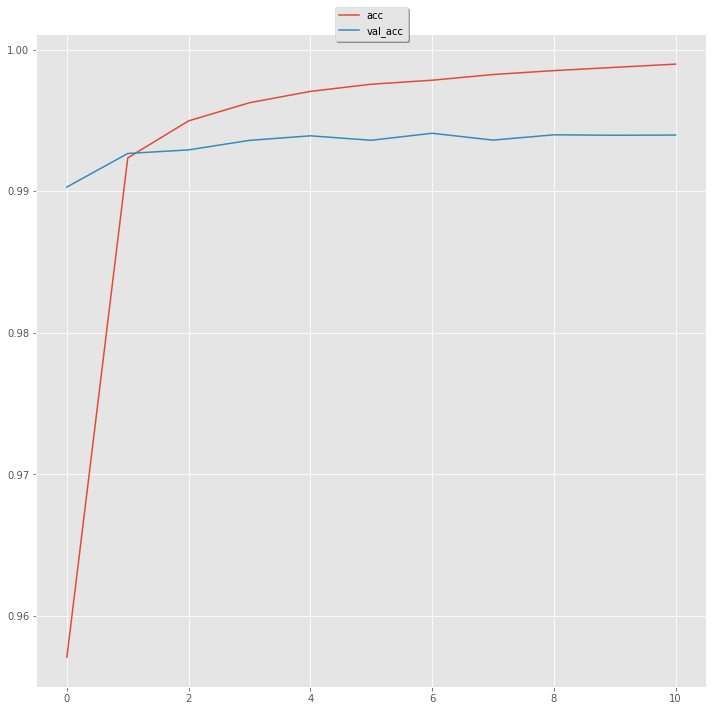

In [ ]:
hist = pd.DataFrame(history.history)
plt.style.use("ggplot")
plt.figure(figsize=(12,12))
plt.plot(hist["crf_viterbi_accuracy"], label="acc")
plt.plot(hist["val_crf_viterbi_accuracy"], label="val_acc")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
 fancybox=True, shadow=True)
plt.savefig('Bi-Lstm+CRF')
plt.show()

In [ ]:
if not os.path.exists('/content/drive/MyDrive/BiLSTM_PosTag/Models/'):
    print('MAKING DIRECTORY Models/ to save model file')
    os.makedirs('/content/drive/MyDrive/BiLSTM_PosTag/Models/')

# Testing

In [ ]:
def logits_to_tokens(sequences, index):
    token_sequences = []
    for categorical_sequence in sequences:
        token_sequence = []
        for categorical in categorical_sequence:
            token_sequence.append(index[np.argmax(categorical)])
        token_sequences.append(token_sequence)
 
    return token_sequences

In [ ]:
predictions = model.predict(X_test,verbose=1)

1684/1684 [==============================] - 4s 2ms/step


In [ ]:
len(predictions)

1684

In [ ]:
Y_PRED=logits_to_tokens(predictions, {i: t for t, i in tag2int.items()})

# Saving in CSV

In [ ]:
import csv

In [ ]:
fields=['word','correct_tag','predicted_tag']

In [ ]:
li=open("/content/drive/MyDrive/BiLSTM_PosTag/try1_output.csv",'w')

In [ ]:
writer=csv.writer(li)

In [ ]:
writer.writerow(fields)

32

In [ ]:
print(len(X_test), len(Y_PRED),len(Y_test_copy))

1684 1684 1684


In [ ]:
file=open("/content/drive/MyDrive/HINDI_POS_RESULT.txt",'w')
ni=0
count=0
for li in Y_PRED:
  #  file.write('#\n')
    count+=1
    if(count==35152):
        print(li,ni)
    for wi in li:
        if(wi!='-PAD-'):
            ni+=1
            file.write(wi+'\n')
    file.write('\n')
file.close()

In [ ]:
for i in range(len(X_test)):
  for j in range(len(X_test[i])):
    if(int2word[X_test[i][j]]!='-PAD-'):
      writer.writerow([int2word[X_test[i][j]],int2tag[Y_test_copy[i][j]],Y_PRED[i][j]])

IndexError: ignored

In [ ]:
len(Y_test_copy)

In [ ]:
pred=[]
for i in Y_PRED:
  li=[]
  for x in i:
    if(x!='-PAD-'):
      li.append(x)
  pred.append(li)

In [ ]:
len(pred)

1684

In [ ]:
correct =0
wrong=0

In [ ]:
for i in range(len(pred)):
  for x in range(len(pred[i])):
    if(pred[i][x]==Y_test_copy[i][x]):
      correct+=1
    else:
      wrong+=1

In [ ]:
correct, wrong

(33881, 1549)

In [ ]:
correct/( correct+wrong)

0.9562799887101326